# Laplace pressure starting form differential geometry

As reported in the other notebooks, Laplace pressure is related to the curvature of the surface:
$$
    \Delta p = \alpha (\frac{1}{R_1} + \frac{1}{R_2}) = \alpha k
$$
where k is the mean curvature of the system.


If one defines the surface as $\sigma(x,y) = (x,y,f(x,y))$ and $f_x,f_y, f_{xx}, f_{yy}$ as the derivatives with respect to x and y one or two times, the mean curvature can be written as:
$$
    k = \frac{1}{(1+ f_x^2 + f_y^2)^\frac{3}{2}} (f_{yy}(1+ f_x^2)+ f_{xx}(1+f_y^2)-2f_x f_y f_{xy})
$$

This code  aims to build a method which starts from a parametrization as $(x,y,f(x,y))$ for a surface and compute the laplace pressure.

# Using sympy for derivatives

In [1]:
import numpy as np
import sympy as sp
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
def sphere(x, y, r=1):
    z_squared = r**2 - x**2 - y**2
    z_squared = np.maximum(z_squared, 0) 
    Z_sup = np.sqrt(z_squared)  
    return Z_sup


In [24]:
import plotly.graph_objects as go

r = 1 
theta = np.linspace(0, np.pi, 10)
phi = np.linspace(0, 2 * np.pi, 20) 

theta, phi = np.meshgrid(theta, phi)

x_data = r * np.sin(theta) * np.cos(phi)
y_data = r * np.sin(theta) * np.sin(phi)


X, Y = np.meshgrid(x_data, y_data)
Z_data = sphere(X, Y)
data=np.column_stack((X.ravel(), Y.ravel(),Z_data.ravel()))
data=data[data[:, 2] != 0]
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode='markers',
    marker=dict(size=5, color=data[:,2], colorscale='viridis', opacity=0.8)
)])
fig.show()

In [25]:
def sphere_sp(x,y):
    '''
        Define the shape of the surphace using only simpy function
    '''
    return  sp.sqrt(r**2 - x**2 - y**2)

In [26]:
def surface_derivatives(z):
    '''
        Compute the derivatives of the surface z(x,y). 
        
        Arguments:
            z is the parametrization of the surface as (x,y,z(x,y)) using sympy function
        Returns all the derivatives 
    '''
    x, y = sp.symbols('x y')
    f = z(x,y)

    df_dx = sp.diff(f, x)
    df_dy = sp.diff(f, y)
    df_dxx = sp.diff(f, x,x)
    df_dyy = sp.diff(f, y,y)
    df_dxy = sp.diff(f, x,y)
    return df_dx,df_dy,df_dxx,df_dyy,df_dxy

In [27]:
surface_derivatives(sphere_sp)

(-x/sqrt(-x**2 - y**2 + 1),
 -y/sqrt(-x**2 - y**2 + 1),
 -(x**2/(-x**2 - y**2 + 1) + 1)/sqrt(-x**2 - y**2 + 1),
 -(y**2/(-x**2 - y**2 + 1) + 1)/sqrt(-x**2 - y**2 + 1),
 -x*y/(-x**2 - y**2 + 1)**(3/2))

In [52]:
pressure=[]
index = []
df_dx,df_dy,df_dxx,df_dyy,df_dxy = surface_derivatives(sphere_sp)
for i in range(len(data)):

    f_x = df_dx.subs({x: data[i,0], y: data[i,1] })
    f_y = df_dy.subs({x: data[i,0], y: data[i,1] })
    f_xx = df_dxx.subs({x: data[i,0], y: data[i,1] })
    f_yy = df_dyy.subs({x: data[i,0], y: data[i,1] })
    f_xy = df_dyy.subs({x: data[i,0], y: data[i,1] })

    pressure_val = (f_yy*(1+f_x**2)+ f_xx * (1+f_y**2) - 2*f_x*f_y*f_xy)/(np.pow(1+f_x**2+f_y**2,3/2))
    if(pressure_val < -20): index.append(i)
    pressure.append((pressure_val))


In [47]:
pressure = np.array(pressure,dtype=float)
df = pd.DataFrame(pressure, columns=['pressure'])
df['pressure'].describe()


count    36192.000000
mean        -2.903269
std         26.536595
min      -1518.797506
25%         -2.061881
50%         -2.000000
75%         -1.993993
max        281.578245
Name: pressure, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x112cfa0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10ef2ecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x112cfa5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x10ef2e0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10ef2eee0>],
 'means': []}

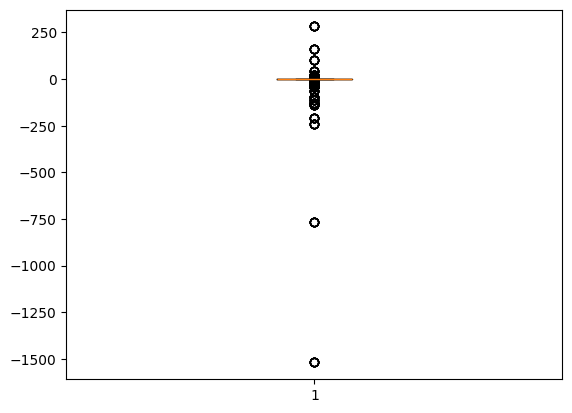

In [48]:
plt.boxplot(pressure)

In [49]:
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode='markers',
    marker=dict(size=5, color=pressure, colorscale='viridis',colorbar=dict(title="Pressure"))
)])
fig.show()

In [82]:
pressure_mod = pressure
for i in range(len(pressure)):
    if (pressure[i]<-20 or pressure[i] >20):
        pressure_mod [i] = 0
    #print(pressure[i],sphere(data[i,0],data[i,1]),data[i,0],data[i,1])
pressure_mod = np.array(pressure_mod, dtype='float64')

In [80]:
i = 6934
f_x = df_dx.subs({x: data[i,0], y: data[i,1] })
f_y = df_dy.subs({x: data[i,0], y: data[i,1] })
f_xx = df_dxx.subs({x: data[i,0], y: data[i,1] })
f_yy = df_dyy.subs({x: data[i,0], y: data[i,1] })
f_xy = df_dyy.subs({x: data[i,0], y: data[i,1] })
print(f_x, f_y, f_xx, f_yy, f_xy)
#np.pow(1+f_x**2+f_y**2,3/2)
#(f_yy*(1+f_x**2)+ f_xx * (1+f_y**2) - 2*f_x*f_y*f_xy)#(np.pow(1+f_x**2+f_y**2,3/2))
(np.pow(1+f_x**2+f_y**2,3/2))

3.88432013756925 -4.22218015557528 -93.6903401074565 -109.640480207587 -109.640480207587


197.507183290189

In [75]:
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode='markers',
    marker=dict(size=5, color=pressure_mod, colorscale='viridis',colorbar=dict(title="Pressure"))
)])
fig.show()

In [76]:
pressure_mod = pressure
for i in range(len(pressure)):
    if (pressure[i]<-20 or pressure[i] >20):
        pressure_mod [i] = 0
    #print(pressure[i],sphere(data[i,0],data[i,1]),data[i,0],data[i,1])
pressure_mod = np.array(pressure_mod)

## Cylinder

In [84]:
def cylinder(x, y,r=1):
    
    return np.sqrt(r-x**2)

In [85]:
def cylinder_sp(x,y):
    '''
        Define the shape of the surphace using only simpy function
    '''
    return  sp.sqrt(r-x**2)

In [92]:
def pressure_comp(func_z,data):
    '''
        Compute the pressure (mean curvature) apart from a constant given a surface z(x,y). 
        
        Arguments:
            func_z: is the parametrization of the surface as (x,y,z(x,y)) using sympy functions
            data: an array with data with shape (len(data),3)
        Returns an array with the local pressure
    '''
    pressure=[]
    df_dx,df_dy,df_dxx,df_dyy,df_dxy = surface_derivatives(func_z)
    for i in range(len(data)):

        f_x = df_dx.subs({x: data[i,0], y: data[i,1] })
        f_y = df_dy.subs({x: data[i,0], y: data[i,1] })
        f_xx = df_dxx.subs({x: data[i,0], y: data[i,1] })
        f_yy = df_dyy.subs({x: data[i,0], y: data[i,1] })
        f_xy = df_dyy.subs({x: data[i,0], y: data[i,1] })

        pressure_val = (f_yy*(1+f_x**2)+ f_xx * (1+f_y**2) - 2*f_x*f_y*f_xy)/(np.pow(1+f_x**2+f_y**2,3/2))
        pressure.append((pressure_val))
    return pressure

In [86]:
r = 1 
x_data = np.linspace(-1, 1, 200)
y_data = np.linspace(-1, 1, 200)

X, Y = np.meshgrid(x_data, y_data)
Z_data = cylinder(X,Y,r)
data=np.column_stack((X.ravel(), Y.ravel(),Z_data.ravel()))
#data=data[data[:, 2] != 0]
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode='markers',
    marker=dict(size=5, color=data[:,2], colorscale='viridis', opacity=0.8)
)])
fig.show()

In [120]:
pressure = pressure_comp (cylinder_sp, data)


In [123]:
pressure = np.array(pressure,dtype='float64')
df = pd.DataFrame(pressure, columns=['pressure'])
df['pressure'].describe()

count    3.960000e+04
mean    -1.000000e+00
std      1.329665e-16
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max     -1.000000e+00
Name: pressure, dtype: float64

In [126]:
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode='markers',
    marker=dict(
        size=5, 
        color=pressure, 
        colorscale='viridis',
        colorbar=dict(
            title="Pressure",
            x=0.6,  
            y=0.5,  
        ),
        cmin=-1.5, 
        cmax=-0.5
    )
)])
fig.show()

The values at the boundary are set as Nan because the f_y is a complex number due to the square of a negative number

## Perturbation in cylindric surface

In [152]:
def cylinder_pert(x, y,r=1, b=0.3,k=5):
    return np.pow((r-x**2) + b*np.cos(k*y),0.5)

In [157]:
def cylinder_pert_sp(x, y,r=1, b=0.3,k=5):
    return sp.Pow((r-x**2) + b*sp.cos(k*y),0.5)

In [159]:
r = 1 
x_data = np.linspace(-1, 1, 100)
y_data = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x_data, y_data)
Z_data = cylinder_pert(X,Y,r)
data=np.column_stack((X.ravel(), Y.ravel(),Z_data.ravel()))
#data=data[data[:, 2] != 0]
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode='markers',
    marker=dict(size=5, color=data[:,2], colorscale='viridis', opacity=0.8)
)])
fig.show()

/var/folders/cn/hyjh06ds2hjfcptxf4pk4g_w0000gp/T/ipykernel_13501/1912176612.py:2: RuntimeWarning:

invalid value encountered in power



In [160]:
pressure = pressure_comp (cylinder_pert_sp, data)

In [174]:
pressure = np.array(pressure,dtype='float64')
df = pd.DataFrame(pressure, columns=['pressure'])
df['pressure'].describe()

count    10000.000000
mean        -2.377854
std         19.182223
min       -904.850338
25%         -2.856474
50%         -1.134831
75%          0.305013
max          3.986643
Name: pressure, dtype: float64

This method is not working at the boundaries. So I'm setting to 0 the boundary terms to understand if on the cosine profile of the surface the algorithm understands the Rayleight-Plateu instability

In [181]:
pressure_mod = pressure
for i in range(len(pressure_mod)):
    if (pressure_mod[i]<-20): pressure_mod[i]=0

In [182]:
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode='markers',
    marker=dict(
        size=5, 
        color=pressure_mod, 
        colorscale='viridis',
        colorbar=dict(
            title="Pressure",
            x=0.6,  
            y=0.5,  
        ),
    )
)])
fig.show()

To overcome the problems of numerical approximation and symmetry of the problem, one can introduce other parametrization of these surface. This method needs a different computation of the mean curvature:
$$
    k= \frac{LG-2MF+NE}{EG-F^2}
$$
for the definition of the symbols see the reference https://faculty.sites.iastate.edu/jia/foundations-robotics-and-computer-vision-coms-47705770 in chapter 5.


# Sphere
In this part we'll use $\sigma(\theta,\phi) = (cos\theta cos \phi, cos \theta sin \phi, sin\theta)$ as parametrization of the sphere

In [12]:
r = 1 
theta = np.linspace(-np.pi, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100) 

theta, phi = np.meshgrid(theta, phi)

x_data = r * np.cos(theta) * np.cos(phi)
y_data = r * np.cos(theta) * np.sin(phi)
Z_data = r * np.sin(theta)


data=np.column_stack((x_data.ravel(), y_data.ravel(),Z_data.ravel()))

fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode='markers',
    marker=dict(size=5, color=data[:,2], colorscale='viridis', opacity=0.8)
)])
fig.show()

In [ ]:
def parametrization_sp()